<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Derivatives Analytics with Python

**_Chapter 11_**

**Wiley Finance (2015)**

<img src="http://hilpisch.com/images/derivatives_analytics_front.jpg" alt="Derivatives Analytics with Python" width="30%" align="left" border="0">

Dr. Yves J. Hilpisch

The Python Quants GmbH

<a href='mailto:dawp@tpq.io'>dawp@tpq.io</a> | <a href='http://tpq.io'>http://tpq.io</a>

Python online training | <a href='http://training.tpq.io'>http://training.tpq.io</a>

DX Analytics library | <a href='http://dx-analytics.com'>http://dx-analytics.com</a>

In [1]:
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

## Chapter 11: Calibration

### Short Rate Model

In [2]:
%run 11_cal/CIR_calibration.py

In [3]:
r_list  # spot rates

array([-0.000320, -0.000130, -0.000130, 0.000070, 0.000430, 0.000830,
       0.001830, 0.002510, 0.003380])

In [4]:
zero_rates

array([-0.000320, -0.000130, -0.000130, 0.000070, 0.000430, 0.000830,
       0.001829, 0.002508, 0.003374])

In [5]:
t_list

array([0.002778, 0.019444, 0.038889, 0.083333, 0.166667, 0.250000,
       0.500000, 0.750000, 1.000000])

In [6]:
opt = CIR_calibration()
opt

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 270
         Function evaluations: 485


array([0.146849, 0.104511, 0.175197])

In [7]:
f

array([-0.000387, -0.000063, 0.000585, 0.000794, 0.001210, 0.001754,
       0.002155, 0.002463, 0.002730, 0.002960, 0.003155, 0.003317,
       0.003454, 0.003594, 0.003751, 0.003938, 0.004168, 0.004452,
       0.004804, 0.005234, 0.005757, 0.006383, 0.007125, 0.007996])

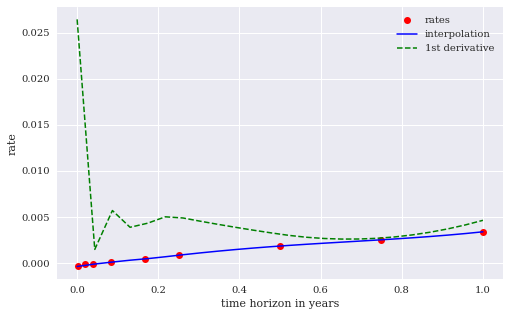

In [8]:
plot_term_structure()
plt.savefig('../images/11_cal/term_structure.pdf')

In [9]:
CIR_forward_rate(opt)

array([-0.000320, 0.000015, 0.000347, 0.000677, 0.001006, 0.001332,
       0.001656, 0.001977, 0.002297, 0.002614, 0.002930, 0.003243,
       0.003554, 0.003863, 0.004169, 0.004474, 0.004776, 0.005076,
       0.005374, 0.005670, 0.005963, 0.006254, 0.006544, 0.006831])

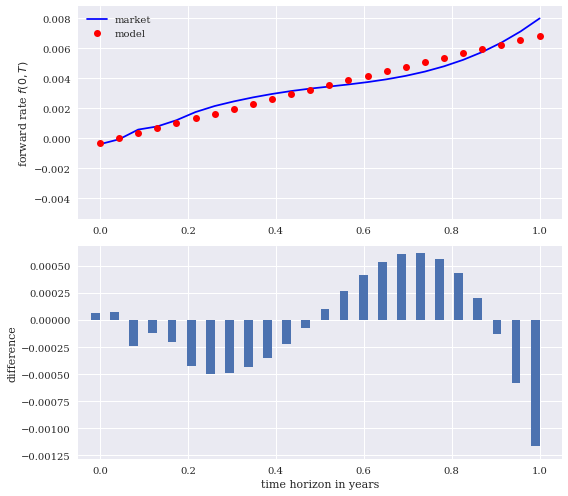

In [10]:
plot_calibrated_frc(opt)
plt.savefig('../images/11_cal/frc_calibration.pdf')

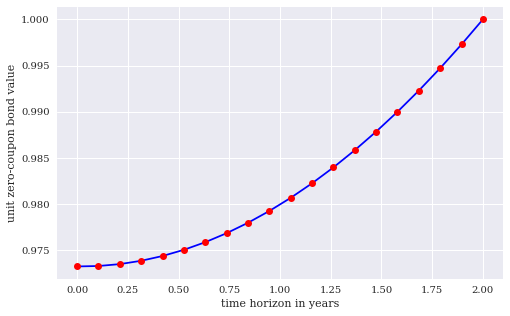

In [11]:
plot_zcb_values(opt, 2.0)
plt.savefig('../images/11_cal/CIR_zcb_values.pdf')

## Stochastic Volatility Calibration

### Calibration Procedure

In [12]:
%run 11_cal/H93_calibration.py

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 270
         Function evaluations: 485


In [13]:
len(options)

15

In [14]:
options

,Date,Strike,Call,Maturity,Put,T,r
38,2014-09-30,3175.0,126.8,2014-12-19,78.8,0.219178,0.001349
39,2014-09-30,3200.0,110.9,2014-12-19,87.9,0.219178,0.001349
40,2014-09-30,3225.0,96.1,2014-12-19,98.1,0.219178,0.001349
41,2014-09-30,3250.0,82.3,2014-12-19,109.3,0.219178,0.001349
42,2014-09-30,3275.0,69.6,2014-12-19,121.6,0.219178,0.001349
342,2014-09-30,3175.0,171.0,2015-03-20,129.2,0.468493,0.003203
343,2014-09-30,3200.0,156.1,2015-03-20,139.4,0.468493,0.003203
344,2014-09-30,3225.0,142.0,2015-03-20,150.3,0.468493,0.003203
345,2014-09-30,3250.0,128.5,2015-03-20,161.8,0.468493,0.003203
346,2014-09-30,3275.0,115.8,2015-03-20,174.0,0.468493,0.003203


In [15]:
%time opt_sv = H93_calibration_full()

   0 | [2.500 0.010 0.050 -0.750 0.010] | 1383.261 | 500.000
  25 | [2.500 0.020 0.050 -0.750 0.010] | 776.135 |  37.017
  50 | [2.500 0.020 0.250 -0.750 0.020] | 189.987 |  11.029
  75 | [2.500 0.030 0.150 -0.750 0.030] |  73.318 |   7.465
 100 | [2.500 0.040 0.050 -0.500 0.010] | 215.473 |   7.465
 125 | [2.500 0.040 0.250 -0.500 0.020] |  34.849 |   7.465
 150 | [7.500 0.010 0.150 -0.500 0.030] | 344.185 |   7.465
 175 | [7.500 0.020 0.050 -0.250 0.010] | 433.526 |   7.465
 200 | [7.500 0.020 0.250 -0.250 0.020] | 151.386 |   7.465
 225 | [7.500 0.030 0.150 -0.250 0.030] |  87.733 |   7.465
 250 | [7.500 0.040 0.050 0.000 0.010] | 171.852 |   7.465
 275 | [7.500 0.040 0.250 0.000 0.020] | 227.431 |   7.465
 300 | [2.078 0.023 0.220 -0.871 0.028] |   5.897 |   5.683
 325 | [1.777 0.024 0.223 -0.900 0.028] |   5.539 |   5.358
 350 | [1.518 0.023 0.243 -0.968 0.028] |   5.167 |   5.147
 375 | [2.027 0.024 0.237 -0.992 0.028] |   5.043 |   4.997
 400 | [2.820 0.024 0.236 -0.998 0.028] |

In [16]:
opt_sv

array([18.447, 0.026, 0.978, -0.821, 0.035])

In [17]:
tmpl = r'''
\begin{itemize}
    \item $\kappa_v = %.3f$
    \item $\theta_v = %.3f$
    \item $\sigma_v = %.3f$
    \item $\rho = %.3f$
    \item $v_0 = %.3f$
\end{itemize}
'''
results = tmpl % tuple(opt_sv)
rf = open('11_cal/H93_results.tex', 'w')
rf.writelines(results)
rf.close()

In [18]:
options['Model'] = H93_calculate_model_values(opt_sv)

In [19]:
np.sum(options['Model'] - options['Call'])

0.074370708113228545

In [20]:
np.sum(abs(options['Model'] - options['Call']))

6.4923097895529267

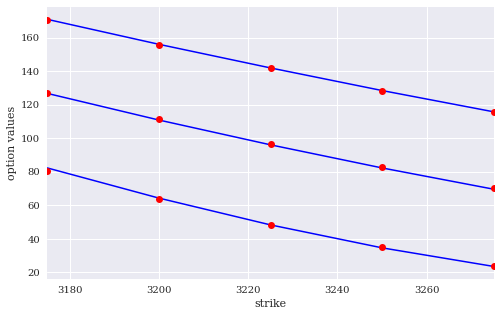

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
for mat in set(options['Maturity']):
    options[options.Maturity == mat].plot(x='Strike', y='Call',
                                          style='b', lw=1.5,
                                          legend=False, ax=ax)
    options[options.Maturity == mat].plot(x='Strike', y='Model',
                                          style='ro', legend=False,
                                          ax=ax)
plt.xlabel('strike')
plt.ylabel('option values')
plt.grid(True)
plt.savefig('../images/11_cal/H93_calibration_quotes.pdf')

### Implied Volatilities

In [22]:
options['Model'] = H93_calculate_model_values(opt_sv)

In [23]:
filename = '11_cal/cal_results_sv.h5'
h5 = pd.HDFStore(filename, 'w')
h5['options'] = options
h5.close()

In [24]:
%run 11_cal/plot_implied_volatilities.py

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 270
         Function evaluations: 485


In [25]:
options = calculate_implied_volatilities(filename)

In [26]:
# total net error
print(np.sum(options['model_iv'] - options['market_iv']))
# total absolute error
print(np.sum(abs(options['model_iv'] - options['market_iv'])))

-0.00139413807759
0.0173881320372


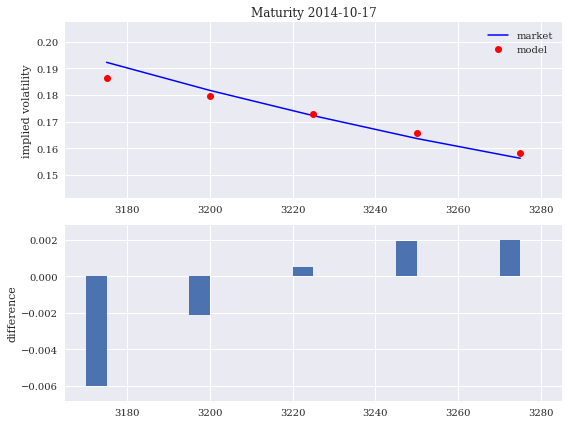

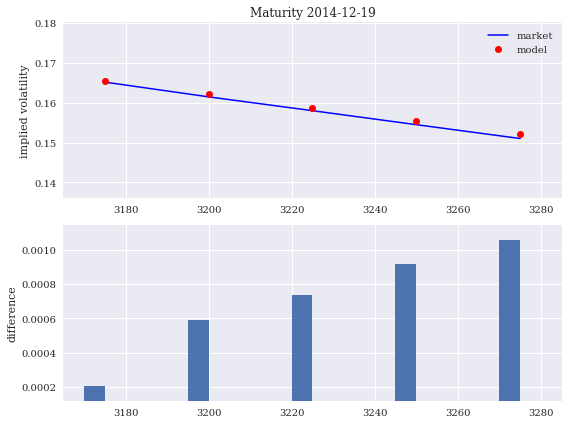

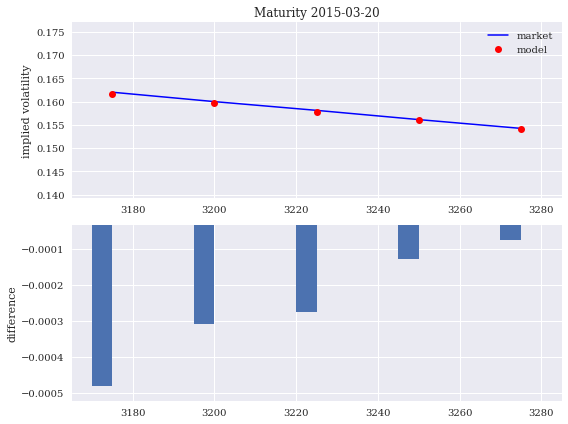

In [27]:
plot_implied_volatilities(options, 'H93')

## Short-Term Index Calibration

### Calibration Procedure

In [28]:
%run 11_cal/BCC97_calibration_short.py

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 270
         Function evaluations: 485


In [29]:
len(options)

5

In [30]:
%time opt_jump = BCC_calibration_short()

   0 | [0.000 -0.500 0.000] |   0.651 |   0.651
  25 | [0.200 -0.500 0.000] |  40.649 |   0.651
  50 | [0.400 -0.500 0.250] | 160.988 |   0.651
  75 | [0.000 -0.525 0.000] |   0.651 |   0.646
 100 | [0.011 -0.236 0.001] |   0.580 |   0.577
 125 | [0.009 -0.532 0.000] |   0.558 |   0.558
 150 | [0.008 -0.599 0.000] |   0.558 |   0.558
 175 | [0.008 -0.600 0.001] |   0.558 |   0.558
 200 | [0.008 -0.600 0.001] |   0.558 |   0.558
Optimization terminated successfully.
         Current function value: 0.557747
         Iterations: 118
         Function evaluations: 220
CPU times: user 27.8 s, sys: 78.1 ms, total: 27.8 s
Wall time: 27.9 s


In [31]:
opt_jump

array([0.008, -0.600, 0.001])

In [32]:
tmpl = r'''
\begin{itemize}
    \item $\lambda = %.3f$
    \item $\mu = %.3f$
    \item $\delta = %.3f$
\end{itemize}
'''
results = tmpl % tuple(opt_jump)
rf = open('11_cal/BCC97_jump_results.tex', 'w')
rf.writelines(results)
rf.close()

In [33]:
options['Model'] = BCC_jump_calculate_model_values(opt_jump)

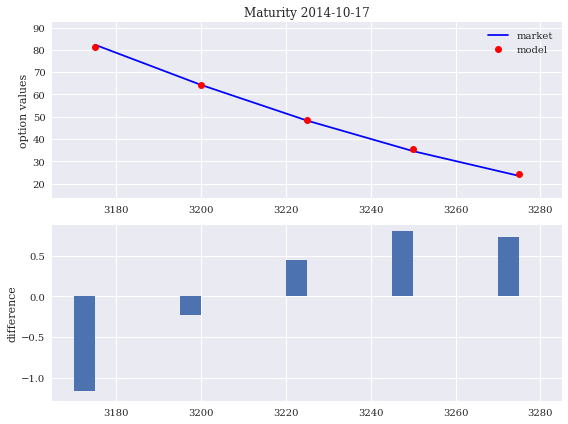

In [34]:
plot_calibration_results(opt_jump)
plt.savefig('../images/11_cal/BCC97_jump_calibration_quotes.pdf')

## Full Index Calibration

### Calibration Procedure

In [35]:
%run 11_cal/BCC97_calibration_full.py

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 270
         Function evaluations: 485


In [36]:
len(options)

15

In [37]:
%time opt_full = BCC_calibration_full()

   0 | [18.447 0.026 0.978 -0.821 0.035 0.008 -0.600 0.001] |   3.398 |   3.398
  25 | [19.073 0.026 0.977 -0.871 0.034 0.008 -0.586 0.001] |   0.820 |   0.820
  50 | [19.358 0.025 0.966 -0.883 0.036 0.008 -0.578 0.001] |   0.239 |   0.208
  75 | [19.107 0.025 0.968 -0.895 0.035 0.008 -0.580 0.001] |   0.156 |   0.153
 100 | [19.107 0.025 0.968 -0.891 0.035 0.008 -0.580 0.001] |   0.152 |   0.151
 125 | [19.087 0.025 0.968 -0.903 0.035 0.008 -0.579 0.001] |   0.151 |   0.146
 150 | [19.088 0.025 0.967 -0.917 0.035 0.008 -0.577 0.001] |   0.146 |   0.145
 175 | [19.301 0.025 0.967 -0.920 0.035 0.008 -0.574 0.001] |   0.141 |   0.141
 200 | [20.414 0.025 0.962 -0.964 0.036 0.008 -0.557 0.000] |   0.123 |   0.123
 225 | [21.282 0.025 0.960 -0.981 0.036 0.008 -0.546 0.000] |   0.111 |   0.107
 250 | [21.497 0.025 0.960 -0.983 0.036 0.008 -0.543 0.000] |   0.107 |   0.106
 275 | [21.528 0.025 0.960 -0.985 0.036 0.008 -0.543 0.000] |   0.106 |   0.106
 300 | [21.549 0.025 0.960 -0.985 0.036 

In [38]:
opt_full

array([22.212, 0.025, 0.952, -0.999, 0.036, 0.008, -0.501, 0.000])

In [39]:
tmpl = r'''
\begin{itemize}
    \item $\kappa_v = %.3f$
    \item $\theta_v = %.3f$
    \item $\sigma_v = %.3f$
    \item $\rho = %.3f$
    \item $v_0 = %.3f$
    \item $\lambda = %.3f$
    \item $\mu = %.3f$
    \item $\delta = %.3f$
\end{itemize}
'''
results = tmpl % tuple(opt_full)
rf = open('11_cal/BCC97_full_results.tex', 'w')
rf.writelines(results)
rf.close()

### Calibrated Option Values

In [40]:
options['Model'] = BCC_calculate_model_values(opt_full)

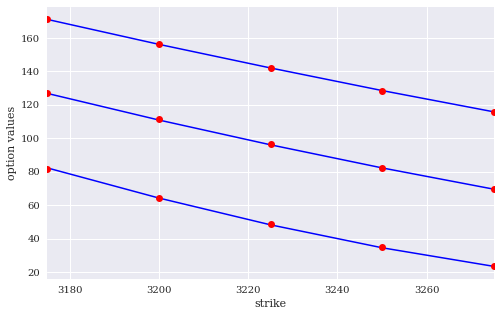

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
for mat in set(options['Maturity']):
    options[options.Maturity == mat].plot(x='Strike', y='Call',
                                          style='b', lw=1.5,
                                          legend=False, ax=ax)
    options[options.Maturity == mat].plot(x='Strike', y='Model',
                                          style='ro', legend=False,
                                          ax=ax)
plt.xlabel('strike')
plt.ylabel('option values')
plt.grid(True)
plt.savefig('../images/11_cal/BCC97_full_calibration_quotes.pdf')

In [42]:
filename = '11_cal/cal_results_full.h5'
h5 = pd.HDFStore(filename, 'w')
h5['options'] = options
h5.close()

### Implied Volatilities

In [43]:
%run 11_cal/plot_implied_volatilities.py

In [44]:
options = calculate_implied_volatilities(filename)

In [45]:
# total net error
print(np.sum(options['model_iv'] - options['market_iv']))
# total absolute error
print(np.sum(abs(options['model_iv'] - options['market_iv'])))

-0.000916384905828
0.00934023531612


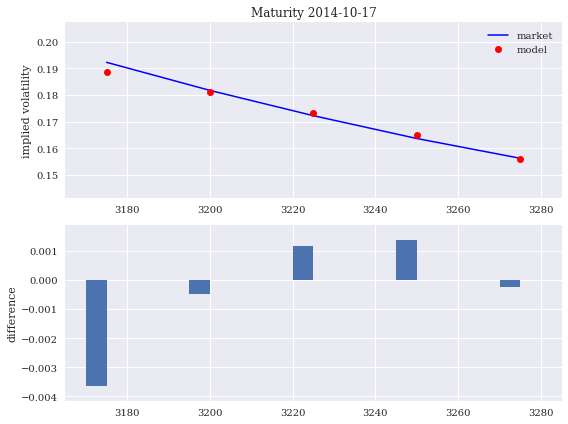

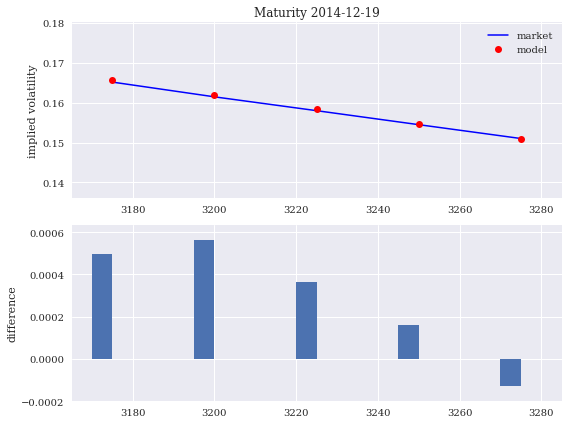

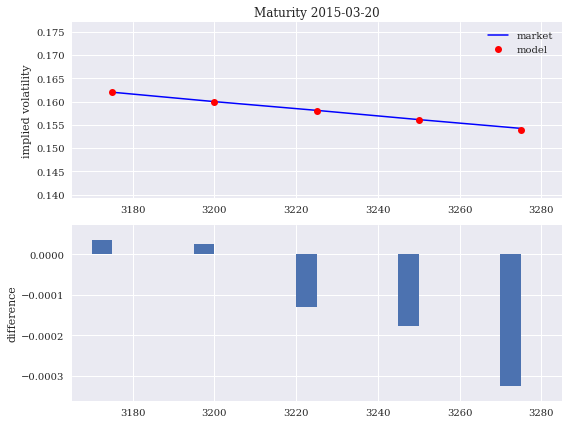

In [46]:
plot_implied_volatilities(options, 'BCC97')

## Implied Volatility Calibration

In [47]:
%run 11_cal/BCC97_calibration_iv.py

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 270
         Function evaluations: 485


In [48]:
len(options)

15

In [49]:
%time opt_iv = BCC_iv_calibration_full()

   0 | [22.212 0.025 0.952 -0.999 0.036 0.008 -0.501 0.000] |   0.102 |   0.102
  25 | [22.379 0.025 0.966 -0.997 0.036 0.008 -0.505 0.000] |   0.100 |   0.100
  50 | [22.615 0.025 0.971 -0.992 0.036 0.008 -0.515 0.000] |   0.098 |   0.094
  75 | [23.543 0.025 1.001 -0.980 0.036 0.008 -0.536 0.000] |   0.082 |   0.082
 100 | [26.268 0.025 1.111 -0.934 0.038 0.008 -0.585 0.000] |   0.057 |   0.053
 125 | [27.073 0.025 1.145 -0.918 0.038 0.009 -0.591 0.000] |   0.053 |   0.053
 150 | [27.334 0.024 1.156 -0.914 0.039 0.009 -0.598 0.000] |   0.053 |   0.053
 175 | [27.443 0.024 1.159 -0.913 0.039 0.009 -0.600 0.000] |   0.053 |   0.052
 200 | [27.446 0.024 1.159 -0.913 0.039 0.009 -0.600 0.000] |   0.052 |   0.052
 225 | [27.476 0.024 1.160 -0.913 0.039 0.009 -0.600 0.000] |   0.052 |   0.052
 250 | [27.735 0.025 1.166 -0.915 0.039 0.008 -0.599 0.000] |   0.052 |   0.052
 275 | [28.197 0.025 1.174 -0.920 0.039 0.008 -0.597 0.000] |   0.052 |   0.052
 300 | [28.055 0.025 1.169 -0.923 0.039 

In [50]:
opt_iv

array([28.473, 0.025, 1.175, -0.953, 0.039, 0.007, -0.600, 0.000])

In [51]:
tmpl = r'''
\begin{itemize}
    \item $\kappa_v = %.3f$
    \item $\theta_v = %.3f$
    \item $\sigma_v = %.3f$
    \item $\rho = %.3f$
    \item $v_0 = %.3f$
    \item $\lambda = %.3f$
    \item $\mu = %.3f$
    \item $\delta = %.3f$
\end{itemize}
'''
results = tmpl % tuple(opt_iv)
rf = open('11_cal/BCC97_iv_results.tex', 'w')
rf.writelines(results)
rf.close()

### Calibrated Option Values

In [52]:
options['Model'] = BCC_calculate_model_values(opt_iv)

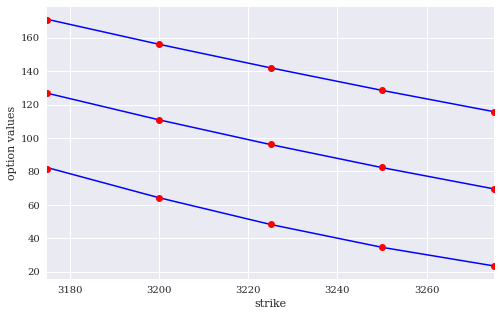

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
for mat in set(options['Maturity']):
    options[options.Maturity == mat].plot(x='Strike', y='Call',
                                          style='b', lw=1.5,
                                          legend=False, ax=ax)
    options[options.Maturity == mat].plot(x='Strike', y='Model',
                                          style='ro', legend=False,
                                          ax=ax)
plt.xlabel('strike')
plt.ylabel('option values')
plt.grid(True)
plt.savefig('../images/11_cal/BCC97_iv_calibration_quotes.pdf')

In [54]:
filename = '11_cal/cal_results_full_iv.h5'
h5 = pd.HDFStore(filename, 'w')
h5['options'] = options
h5.close()

### Calibrated Implied Volatilities

In [55]:
options = calculate_implied_volatilities(filename)

In [56]:
# total net error
print(np.sum(options['model_iv'] - options['market_iv']))
# total absolute error
print(np.sum(abs(options['model_iv'] - options['market_iv'])))

-0.00073362732517
0.0070137001147


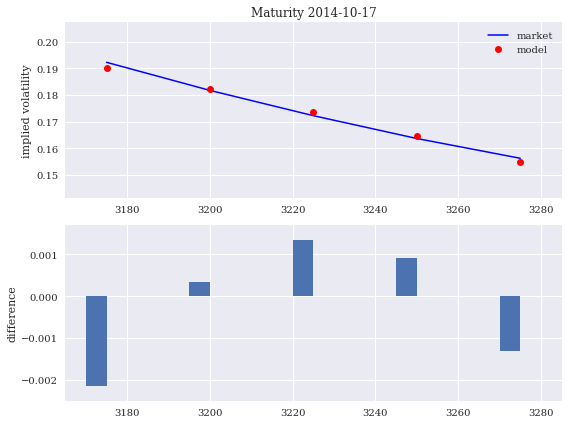

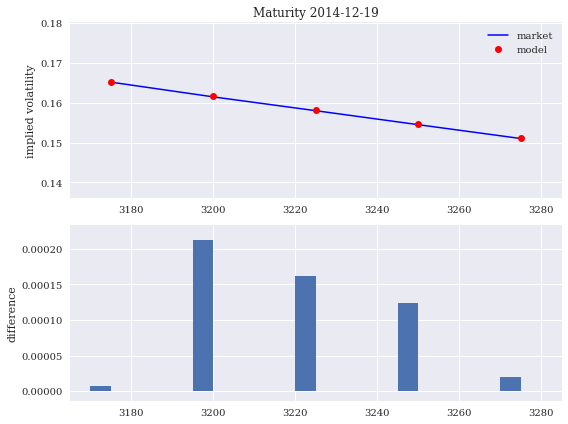

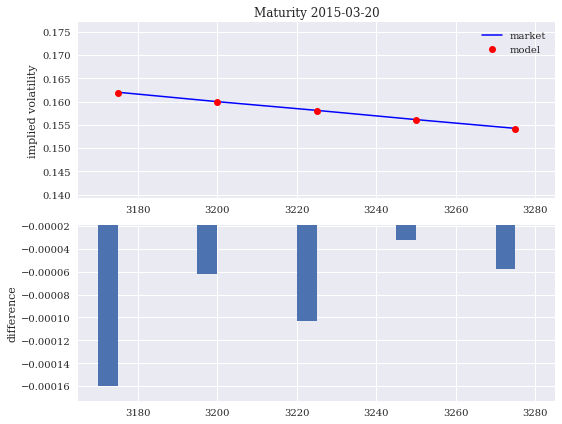

In [57]:
plot_implied_volatilities(options, 'BCC97_iv')

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>

**Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**Python for Finance** |
<a href="http://python-for-finance.com" target="_blank">Python for Finance @ O'Reilly</a>

**Derivatives Analytics with Python** |
<a href="http://derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Listed Volatility and Variance Derivatives** |
<a href="http://lvvd.tpq.io" target="_blank">Listed VV Derivatives @ Wiley Finance</a>

**Python Online Training** |
<a href="http://certificate.tpq.io" target="_blank">Python for Algorithmic Trading University Certificate</a>